<a href="https://colab.research.google.com/github/mrreyesm/FINANCIAL_ASSET_ANALYSIS/blob/main/FINANCIAL_ASSET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FINANCIAL ASSET ANALYSIS - VISA

# Libraries

In [ ]:
#Importing Librarys 
# For system related operations
import sys
# For saving access tokens and for file mngmnt when creating and adding to the dataset
import os
# For Data Processing
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# Data Visualization
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data
import pandas_datareader as pdr
# For time stamps
from datetime import datetime, timedelta
from dateutil.tz import gettz
import time
# For sending GET requests from the API
import requests
# For dealing with json responses we receive from the API
import json
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
# For natural language processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('english')
from nltk import word_tokenize
# For string manipulation
import string
# To create a word cloud with tweets
from wordcloud import WordCloud
# For yahoo finance
!{sys.executable} -m pip install yfinance
import yfinance as yf
# For long strings
import textwrap
# For calculating technical indicators
!{sys.executable} -m pip install -U git+https://github.com/twopirllc/pandas-ta
!{sys.executable} -m pip install TA-Lib
import pandas_ta as ta
#Global variables
# API key
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAKwsZwEAAAAARfPLFsHkhgzkATLhA4UJzvVEugQ%3DL3goAkl3kgtVBWw619JvpHPVGFJsOwetuedpvlozXPaaelGFTt'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-rzyp32wf
  Running command git clone -q https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-rzyp32wf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached TA-Lib-0.4.24.tar.gz (269 kB)
  ERROR: Failed building wheel for TA-Lib
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptoo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
!{sys.executable} -m  pip install scipy
from scipy import stats
!{sys.executable} -m pip install auto-sklearn
# print autosklearn version
import autosklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Extract & Transform (Yahoo Finance API)

In [ ]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-03-19,13.483552,15.636388,12.463788,12.803709,708486000,0.0,0.0
2008-03-20,13.234274,14.729928,13.030321,14.582628,198985200,0.0,0.0


Text(0.5, 0, 'Date')

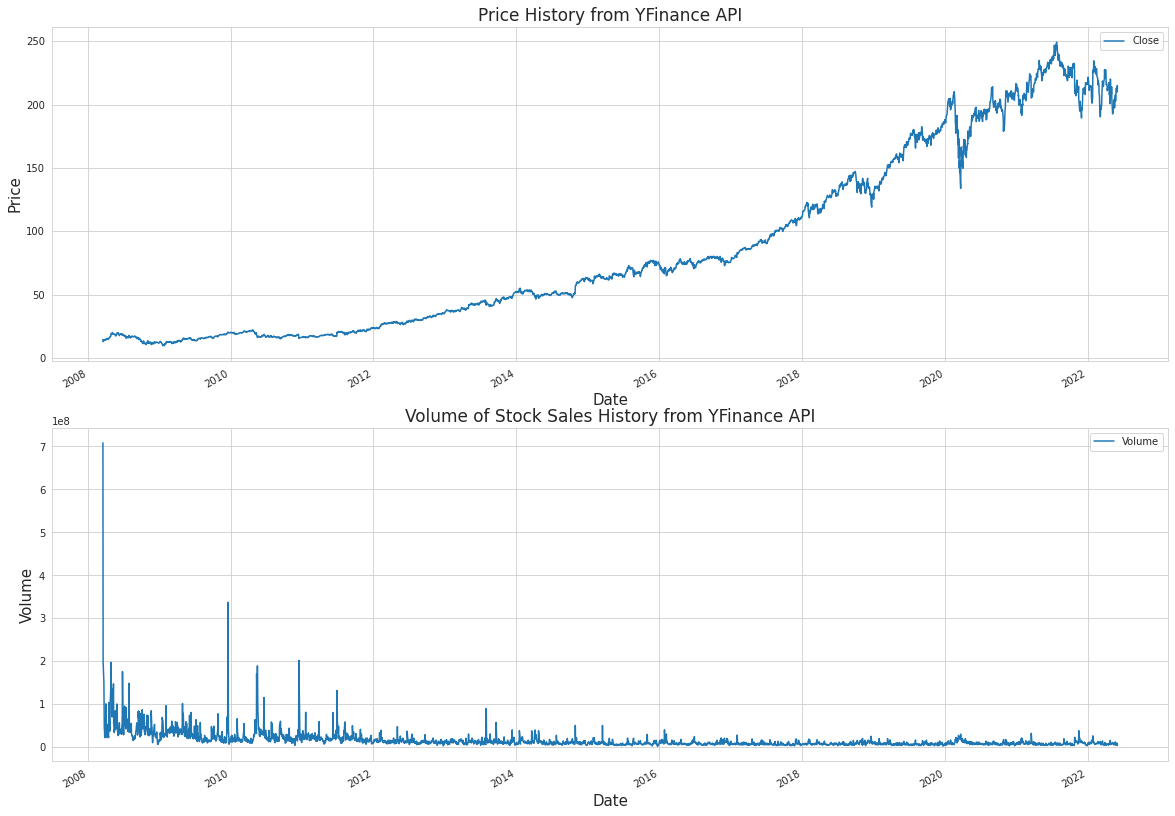

In [ ]:
# Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
hist['Close'].plot(legend=True)
plt.title('Price History from YFinance API',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
# Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
hist['Volume'].plot(legend=True)
plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

In [ ]:
#Basic info
longName = symbol.info["longName"]
shortName = symbol.info["shortName"]
symb = symbol.info["symbol"]
market = symbol.info["market"]
sector = symbol.info["sector"]
industry= symbol.info["industry"]
longBusinessSummary = symbol.info["longBusinessSummary"]
currentPrice = symbol.info["currentPrice"]
currency = symbol.info["currency"]
#Useful information for calculations
recommendationKey = symbol.info["recommendationKey"]
regularMarketDayHigh = symbol.info["regularMarketDayHigh"]
regularMarketDayLow = symbol.info["regularMarketDayLow"]
regularMarketPreviousClose = symbol.info["regularMarketPreviousClose"]
regularMarketOpen = symbol.info["regularMarketOpen"]
regularMarketPrice = symbol.info["regularMarketPrice"]
regularMarketVolume = symbol.info["regularMarketVolume"]
totalDebt= symbol.info["totalDebt"]
totalRevenue= symbol.info["totalRevenue"]
totalDebt= symbol.info["totalDebt"]
ebitda= symbol.info["ebitda"]
marketCap = symbol.info["marketCap"]
regularMarketPrice = symbol.info["regularMarketPrice"]
freeCashflow = symbol.info["freeCashflow"]
open = symbol.info["open"]
currentPrice = symbol.info["currentPrice"]
dayHigh = symbol.info["dayHigh"]
dayLow = symbol.info["dayLow"]
targetHighPrice = symbol.info["targetHighPrice"]
targetLowPrice = symbol.info["targetLowPrice"]
targetMeanPrice= symbol.info["targetMeanPrice"]
targetMedianPrice = symbol.info["targetMedianPrice"]
#symbol.info

In [ ]:
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\nCurrent price: {currentPrice} Currency: {currency}")

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 212.65 Currency: USD


# CAPM Capital Asset Pricing Model

The basic idea is this: if you take on more risk, you expect a higher return.
Otherwise, there's no point in taking the risk.
I wouldn't invest in something that's riskier if it brings me less returns

The question now is: what level of return is appropriate at which risk level? 
And this is what the Capital Asset Pricing Model tries to answer. 
It tells you: at this risk level, this would be an appropriate return.

CAPM Financial Reporting
https://empmd.htw-berlin.de/mod/hvp/view.php?id=1723

German bonds
https://www.bundesbank.de/

In [ ]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist['Returns'] = hist['Close'].pct_change()
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
2008-03-19,13.483554,15.636390,12.463789,12.803711,708486000,0.0,0.0,NaN
2008-03-20,13.234277,14.729932,13.030324,14.582632,198985200,0.0,0.0,0.138938
2008-03-24,15.237542,15.341784,13.370241,13.535669,149566400,0.0,0.0,-0.071795
2008-03-25,13.728296,14.559970,13.556069,14.333356,87092000,0.0,0.0,0.058932
2008-03-26,14.215516,14.612092,13.952643,14.494251,43111600,0.0,0.0,0.011225


In [ ]:
benchmark = yf.Ticker("SPY")
#Basic info
longName = benchmark.info["longName"]
shortName = benchmark.info["shortName"]
symb = benchmark.info["symbol"]
market = benchmark.info["market"]
sectorWeightings = benchmark.info["sectorWeightings"]
longBusinessSummary = benchmark.info["longBusinessSummary"]
preMarketPrice = benchmark.info["preMarketPrice"]
currency = benchmark.info["currency"]
#Print info
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector Weightings: {sectorWeightings}")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\npre Market Price: {preMarketPrice} Currency: {currency}")
# get historical market data
benchmark_hist = benchmark.history(period="max")
benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
benchmark_hist.sort_values(by = "Date", ascending=False).head()

Name: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
Sector Weightings: [{'realestate': 0.0292}, {'consumer_cyclical': 0.1121}, {'basic_materials': 0.024400001}, {'consumer_defensive': 0.0733}, {'technology': 0.2468}, {'communication_services': 0.0864}, {'financial_services': 0.13149999}, {'utilities': 0.024500001}, {'industrials': 0.08270001}, {'energy': 0.0417}, {'healthcare': 0.1428}]
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

pre Market Price: None Currency: USD


,Open,High,Low,bnchmrk_Close,Volume,Dividends,Stock Splits,bnchmrk_Returns
Date,,,,,,,,
2022-06-03,412.399994,414.040009,409.510010,410.540009,71830800,0.0,0,-0.016412
2022-06-02,409.420013,417.440002,407.040009,417.390015,79609600,0.0,0,0.019043
2022-06-01,415.170013,416.239990,406.929993,409.589996,86585800,0.0,0,-0.008089
2022-05-31,413.549988,416.459991,410.029999,412.929993,95937000,0.0,0,-0.005611
2022-05-27,407.910004,415.380005,407.700012,415.260010,84768700,0.0,0,0.024549


In [ ]:
capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
capm = capm.last('13M')
print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
mean_return_stock = capm['Returns'].mean()
stddev_return_stock = capm['Returns'].std()
print(
    "\nDAILY MEAN RETURN: ", mean_return_stock,
    "\nYEARLY MEAN RETURN: ", ((1+mean_return_stock)**250)-1,
    "\nSTD DEV: ", stddev_return_stock)
mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
print(
    "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
    "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1,
    "\nSTD DEV: ", stddev_return_benchmark_hist)
yearly_stock_returns = ((1+mean_return_stock)**250)-1
yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
capm.head()

START DATE:  2021-06-01 00:00:00 END DATE:  2022-06-03 00:00:00

DAILY MEAN RETURN:  -6.0617038054859834e-05 
YEARLY MEAN RETURN:  -0.015040463978844842 
STD DEV:  0.01871925249578199

DAILY RM or MARKET RETURN:  2.7223961479857367e-05 
YEARKY RM or MARKET RETURN:  0.006829110481896494 
STD DEV:  0.011450412259182693


,Close,Returns,bnchmrk_Close,bnchmrk_Returns
Date,,,,
2021-06-01,225.126816,-0.002948,414.219086,-0.000881
2021-06-02,228.136734,0.013370,414.870514,0.001573
2021-06-03,226.596985,-0.006749,413.330750,-0.003711
2021-06-04,228.613541,0.008899,417.111023,0.009146
2021-06-07,229.785721,0.005127,416.706360,-0.000970


Slope:  1.0868368587280741 
Intercept:  -9.020504283176211e-05 
R value:  0.6648091366744329 
P Value:  5.008105602020805e-34 
STD Err:  0.07662647230374554


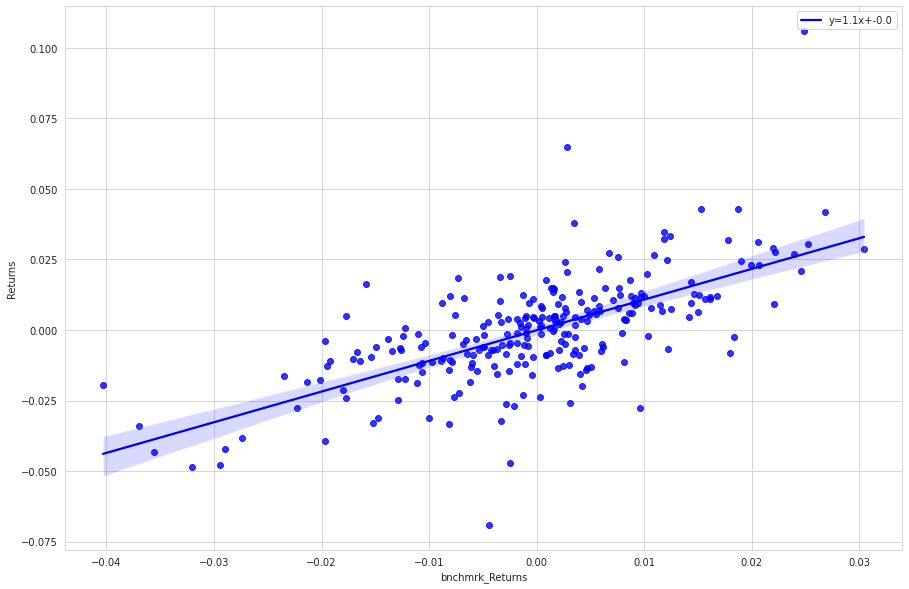

In [ ]:
# get coeffs of linear fit
capm.dropna(inplace=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
print("Slope: ", slope, "\nIntercept: ", intercept,
      "\nR value: ", r_value, "\nP Value: ", p_value,
      "\nSTD Err: ", std_err)
# use line_kws to set line label for legend
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
ax.legend()
plt.show()

expected_return = RFR + Beta*((mean_return_benchmark_hist or RM) -RFR)

In [ ]:
RFR = 0.95 #risk free rate - 9 to 10 years german bonds
beta = slope
shortName = symbol.info["shortName"]

if beta < 1:
  print(f"Beta < 1: less risky than market. Beta: {beta}")
else:
  print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

expected_return = RFR + beta*(yearly_market_returns - RFR)
print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

if expected_return > yearly_stock_returns:
  print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
\nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
else:
  print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
\nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")

Beta >= 1: as risky or more risky than the market. Beta: 1.0868368587280741

Expected return or CAPM return of the stock:  -7.507 %

The CAPM returns are less than the yearly returns of the stock, Visa Inc. is undervalued.

CAPM Returns: -7.507% < Yearly returns of Visa Inc.: -1.504%


# Technical Indicators

## Relative Strength Index (RSI) 

In [ ]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, output: str = None, price: str = 'Close'):
    """
    An implementation of Wells Wilder's RSI calculation as outlined in
    his 1978 book "New Concepts in Technical Trading Systems" which makes
    use of the α-1 Wilder Smoothing Method of calculating the average
    gains and losses across trading periods and the Pandas library.
    @author: https://github.com/alphazwest
    Args:
        df: pandas.DataFrame - a Pandas Dataframe object
        window_length: int - the period over which the RSI is calculated. Default is 14
        output: str or None - optional output path to save data as CSV
        price: str - the column name from which the RSI values are calcuated. Default is 'Close'
    Returns:
        DataFrame object with columns as such, where xxx denotes an inconsequential
        name of the provided first column:
            ['xxx', 'diff', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi']
    """
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['Close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages'
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))

    # Save if specified
    if output is not None:
        df.to_csv(output)

    return df

In [ ]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
# Make RSI Calculations
pandas_rsi(df=hist, window_length=14, price='Close')
print(hist)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2008-03-19   13.483551   15.636387   12.463787   12.803708  708486000   
2008-03-20   13.234278   14.729933   13.030325   14.582633  198985200   
2008-03-24   15.237547   15.341790   13.370246   13.535674  149566400   
2008-03-25   13.728298   14.559972   13.556071   14.333358   87092000   
2008-03-26   14.215515   14.612091   13.952642   14.494250   43111600   
...                ...         ...         ...         ...        ...   
2022-05-27  210.000000  213.229996  209.639999  212.880005    4897200   
2022-05-31  210.380005  214.350006  209.110001  212.169998    9586400   
2022-06-01  212.050003  214.110001  208.820007  209.929993    5246100   
2022-06-02  211.889999  215.250000  211.080002  215.050003    5337200   
2022-06-03  212.949997  214.210007  211.270004  212.649994    4351600   

            Dividends  Stock Splits      diff  gai

In [ ]:
# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
# Create Candlestick chart for price data
fig.add_trace(go.Candlestick(
    x=hist.index,
    open=hist['Open'],
    high=hist['High'],
    low=hist['Low'],
    close=hist['Close'],
    increasing_line_color='#ff9900',
    decreasing_line_color='black',
    showlegend=False
), row=1, col=1)
# Make RSI Plot
fig.add_trace(go.Scatter(
    x=hist.index,
    y=hist['rsi'],
    line=dict(color='#ff9900', width=2),
    showlegend=False,
), row=2, col=1
)
# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1)
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
# Customize font, colors, hide range slider
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# update and display
fig.update_layout(layout)
fig.show()

# Sentiment Analysis

### Yahoo Finance News

In [ ]:
# Create dataframe with news info
stock = "V"
symbol = yf.Ticker(stock)
col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
news_df = pd.DataFrame(columns=col_names)
counter = 0
for news in symbol.news:
  link = news["link"]
  providerPublishTime = news["providerPublishTime"]
  title = news["title"]
  ntype = news["type"]
  uuid = news["uuid"]
# Assemble all data in a list
  res = [link, providerPublishTime, title, ntype, uuid]  
  # Append the result to the CSV file
  counter += 1
  df_length = len(news_df)
  news_df.loc[df_length] = res
# Print the number of tweets for this iteration
print("# of news added: ", counter)
news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
news_df.head()

# of news added:  8


,link,providerPublishTime,title,type,uuid
0,https://finance.yahoo.com/video/creditrich-co-...,2022-06-02 20:59:21,CreditRich co-founders detail the value of cre...,VIDEO,ad07883d-8252-3ab2-a205-84152f332b63
1,https://finance.yahoo.com/news/kenyas-safarico...,2022-06-02 16:50:23,"Safaricom's M-Pesa, Visa offer virtual card fo...",STORY,b419637f-c246-3a10-a379-221da4b8daca
2,https://finance.yahoo.com/news/options-traders...,2022-06-02 12:52:12,Do Options Traders Know Something About Visa (...,STORY,e2c3c931-9447-3b63-b5cb-aea737f1f360
3,https://finance.yahoo.com/news/visa-v-dips-mor...,2022-06-01 21:45:09,Visa (V) Dips More Than Broader Markets: What ...,STORY,5d2b4306-8e0d-35ec-ab52-f7611c1f04c5
4,https://finance.yahoo.com/news/visa-v-fundbox-...,2022-06-01 18:36:06,"Visa (V), Fundbox Tie Up for Digital Aid to Sm...",STORY,5f4c749a-eace-3bdf-8c99-13b226975b00


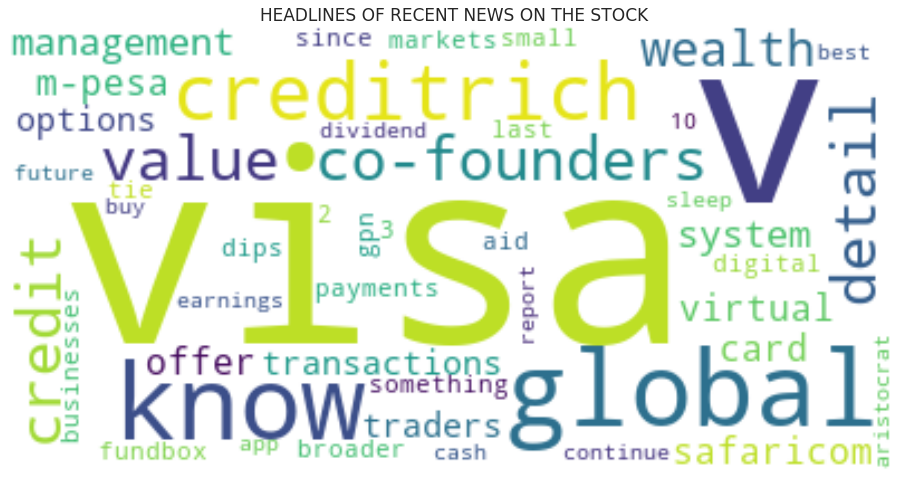

In [ ]:
#Pass to list
data = news_df['title'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["stock", "stocks"]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
plt.show()

### Tweets

In [ ]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):   
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:       
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
    # Print the number of tweets for this iteration 

In [ ]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = f"{shortName} lang:en"
start_time = datetime.now() - timedelta(days=6)
start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
end_time = datetime.now()- timedelta(days=1)
end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
max_results = 100
#Checks response of the request
url = create_url(keyword, start_time, end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

Endpoint Response Code: 200


In [ ]:
tweets = append_to_csv(json_response)
tweets.head()

# of Tweets added from this response:  100


,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,1487475014,2022-06-03 08:54:33+00:00,,1532646911584485377,en,0,0,0,0,Twitter for Android,You've had months to get on top Of it Inc agan...
1,1249020200818786304,2022-06-03 08:09:00+00:00,,1532635446173474816,en,0,0,0,2,Twitter for iPhone,RT @tradingroomke: Safaricom Plc and Visa Inc....
2,1125371122994819074,2022-06-03 06:41:27+00:00,,1532613416967450624,en,0,0,0,2,Twitter for iPhone,RT @tradingroomke: Safaricom Plc and Visa Inc....
3,1298682524235739136,2022-06-03 06:17:26+00:00,,1532607372123746304,en,0,0,0,0,Twitter,itheroes inc is hiring: ETL Tester - Remote\n\...
4,250046331,2022-06-03 05:21:03+00:00,,1532593182629928961,en,1,0,0,2,Twitter Web App,"Safaricom Plc and Visa Inc., on Thursday, intr..."


[('inc', 70), ('co', 47), ('https', 46), ('passport', 36), ('stamps', 36), ('v', 23), ('eu', 22), ('community', 19), ('amp', 19), ('entry', 19), ('event', 18), ('buy', 18), ('important', 18), ('holiday', 18), ('brexit', 18)]


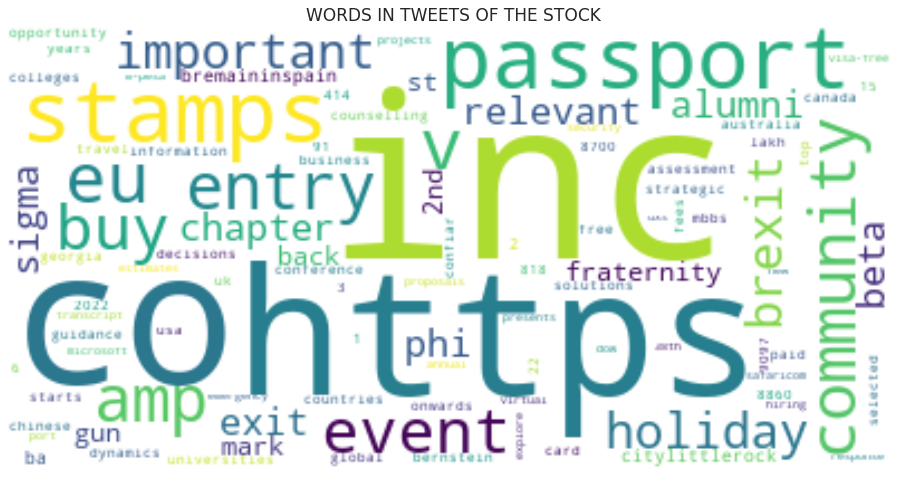

In [ ]:
#Pass to list
data = tweets['tweet'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["rt","visa","stock", "stocks", "..."]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
print(freq_words.most_common(15))
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
plt.show()

# Master functions

In [ ]:
def stock_get_info(stock):
  symbol = yf.Ticker(stock)
  #Basic info
  longName = symbol.info["longName"]
  symb = symbol.info["symbol"]
  market = symbol.info["market"]
  sector = symbol.info["sector"]
  industry= symbol.info["industry"]
  longBusinessSummary = symbol.info["longBusinessSummary"]
  currency = symbol.info["currency"]
  currentPrice = symbol.info["currentPrice"]
  print(f"Name: {longName} Symbol: {symb} Market: {market}")
  print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nCurrent price: {currentPrice} Currency: {currency}")

In [ ]:
def stock_plot_hists(stock):
  symbol = yf.Ticker(stock)
  hist = symbol.history(period="max")
  # Let's see a historical view of the closing price
  plt.rcParams['figure.figsize'] = (16,9)
  plt.subplot(2, 1, 1)
  hist['Close'].plot(legend=True)
  plt.title('Price History from YFinance API',fontsize=17)
  plt.ylabel('Price', fontsize=15)
  plt.xlabel('Date', fontsize=15)
  # Now let's plot the total volume of stock being traded each day
  plt.subplot(2, 1, 2)
  hist['Volume'].plot(legend=True)
  plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
  plt.ylabel('Volume', fontsize=15)
  plt.xlabel('Date', fontsize=15)

In [ ]:
def stock_news_headers_word_cloud(stock, unwanted_words):
  symbol = yf.Ticker(stock)
  # Create dataframe with news info
  col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
  news_df = pd.DataFrame(columns=col_names)
  counter = 0
  for news in symbol.news:
    link = news["link"]
    providerPublishTime = news["providerPublishTime"]
    title = news["title"]
    ntype = news["type"]
    uuid = news["uuid"]
  # Assemble all data in a list
    res = [link, providerPublishTime, title, ntype, uuid]  
    # Append the result to the CSV file
    counter += 1
    df_length = len(news_df)
    news_df.loc[df_length] = res
  # Print the number of tweets for this iteration
  print("# of news added: ", counter)
  news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
  #Pass to list
  data = news_df['title'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["stock", "stocks"]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False,
                        max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
  plt.show()

In [ ]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):  
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:     
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']  
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
def tweeter_request(stock):
  symbol = yf.Ticker(stock)
  name = symbol.info["shortName"]
  #Inputs for the request
  bearer_token = auth()
  headers = create_headers(bearer_token)
  keyword = f"{name} lang:en"
  start_time = datetime.now() - timedelta(days=6)
  start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  end_time = datetime.now()- timedelta(days=1)
  end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  max_results = 100
  url = create_url(keyword, start_time, end_time, max_results)
  json_response = connect_to_endpoint(url[0], headers, url[1])
  tweets = append_to_csv(json_response)
  return tweets
def tweets_word_cloud(tweets_df, unwanted_words):
  #Pass to list
  data = tweets_df['tweet'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  punctuation.append('https')
  punctuation.append('co')
  punctuation.append('t')
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["rt","stock", "stocks", "..."]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
  plt.show()

In [ ]:
def capm_evaluation(stock, market_ref):
  symbol = yf.Ticker(stock)
  print(f"Evaluated company: {symbol.info['longName']}")
  # get historical market data
  hist = symbol.history(period="max")
  hist['Returns'] = hist['Close'].pct_change()
  benchmark = yf.Ticker(market_ref)
  #Basic info
  longName = benchmark.info["longName"]
  shortName = benchmark.info["shortName"]
  symb = benchmark.info["symbol"]
  market = benchmark.info["market"]
  longBusinessSummary = benchmark.info["longBusinessSummary"]
  preMarketPrice = benchmark.info["preMarketPrice"]
  currency = benchmark.info["currency"]
  #Print info
  print("\n--Market reference--")
  print(f"Market: {longName} Symbol: {symb} Market: {market}")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nOpen Price: {open} Currency: {currency}")
  print("\n--CAPM--")
  # get historical market data
  benchmark_hist = benchmark.history(period="max")
  benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
  benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
  capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
  capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
  capm = capm.last('14M')
  print("1 Year data")
  print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
  mean_return_stock = capm['Returns'].mean()
  stddev_return_stock = capm['Returns'].std()
  print(
      "\nDAILY RETURNs OF STOCK: ", mean_return_stock,
      "\nYEARLY RETURNS OF STOCK: ", ((1+mean_return_stock)**250)-1)
  mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
  stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
  print(
      "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
      "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1)
  yearly_stock_returns = ((1+mean_return_stock)**250)-1
  yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
  # get coeffs of linear fit
  capm.dropna(inplace=True)
  slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
  print("Slope: ", slope, "\nIntercept: ", intercept,
        "\nR value: ", r_value, "\nP Value: ", p_value,
        "\nSTD Err: ", std_err)
  RFR = 0.95 #risk free rate - 9 to 10 years german bonds
  print("Risk Free Rate (RFR): ", RFR)
  beta = slope
  shortName = symbol.info["shortName"]

  if beta < 1:
    print(f"Beta < 1: less risky than market. Beta: {beta}")
  else:
    print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

  expected_return = RFR + beta*(yearly_market_returns - RFR)
  print(f"Expected return = {RFR} + {beta}*({yearly_market_returns} - {RFR})")
  print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

  if expected_return > yearly_stock_returns:
    print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  else:
    print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  # use line_kws to set line label for legend
  plt.rcParams['figure.figsize'] = (15,10)
  ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
  # plot legend
  ax.legend()
  plt.show()

In [ ]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, price: str = 'Close'):
    """
    An implementation of Wells Wilder's RSI calculation as outlined in
    his 1978 book "New Concepts in Technical Trading Systems" which makes
    use of the α-1 Wilder Smoothing Method of calculating the average
    gains and losses across trading periods and the Pandas library.
    @author: https://github.com/alphazwest
    Args:
        df: pandas.DataFrame - a Pandas Dataframe object
        window_length: int - the period over which the RSI is calculated. Default is 14
        output: str or None - optional output path to save data as CSV
        price: str - the column name from which the RSI values are calcuated. Default is 'Close'
    Returns:
        DataFrame object with columns as such, where xxx denotes an inconsequential
        name of the provided first column:
            ['xxx', 'diff', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi']
    """
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['Close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages'
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi_manual'] = 100 - (100 / (1.0 + df['rs']))

    return df

In [ ]:
def rsi_calculation(stock, years = 1):
  symbol = yf.Ticker(stock)
  # get historical market data
  start_time = datetime.now() - timedelta(days=years*365)
  start_time = start_time.strftime("%Y-%m-%d")
  end_time = datetime.now()
  end_time = end_time.strftime("%Y-%m-%d")
  hist = symbol.history(start=start_time, end=end_time)
  # Make RSI Calculations
  pandas_rsi(df=hist, window_length=14, price='Close')
  return hist

# Create Figure
def rsi_viz(df):
  hist = df
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
  # Create Candlestick chart for price data
  fig.add_trace(go.Candlestick(
      x=hist.index,
      open=hist['Open'],
      high=hist['High'],
      low=hist['Low'],
      close=hist['Close'],
      increasing_line_color='#ff9900',
      decreasing_line_color='black',
      showlegend=False
      ), row=1, col=1)
  # Make RSI Plot
  fig.add_trace(go.Scatter(
      x=hist.index,
      y=hist['rsi_manual'],
      line=dict(color='#ff9900', width=2),
      showlegend=False,
  ), row=2, col=1
  )
  # Add upper/lower bounds
  fig.update_yaxes(range=[-10, 110], row=2, col=1)
  fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
  fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

  # Add overbought/oversold
  fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
  fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
  # Customize font, colors, hide range slider
  layout = go.Layout(
      plot_bgcolor='#efefef',
      # Font Families
      font_family='Monospace',
      font_color='#000000',
      font_size=20,
      xaxis=dict(
          rangeslider=dict(
              visible=False
          )
      )
  )
  # update and display
  fig.update_layout(layout)
  fig.show()

# Evaluate
Evaluate several aspects of a given stock and create a detailed report to support the daily decision to buy or not a stock

In [ ]:
stock = "V"
stock_get_info(stock)

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 212.65 Currency: USD


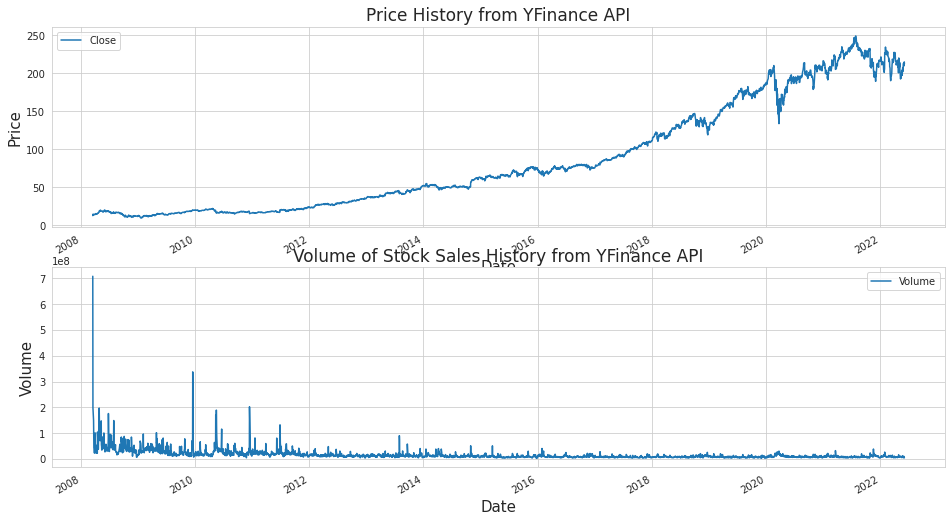

In [ ]:
stock_plot_hists(stock)

Evaluated company: Visa Inc.

--Market reference--
Market: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

Open Price: 212.95 Currency: USD

--CAPM--
1 Year data
START DATE:  2021-05-03 00:00:00 END DATE:  2022-06-03 00:00:00

DAILY RETURNs OF STOCK:  -0.00014539346477552453 
YEARLY RETURNS OF STOCK:  -0.03569824438579672

DAILY RM or MARKET RETURN:  1.631420012339648e-05 
YEARKY RM or MARKET RETURN:  0.0040868452303328695
Slope:  1.0798780632992684 
Intercept:  -0.0001630108116090546 
R value:  0.6679100423692753 
P Value:  5.078135876208144e-37 
STD Err:  0.07269351136267109
Risk Free Rate (RFR):  0.95
Beta >= 1: as risky or more risky than the market. Beta: 1.0798780632992684
Expected return = 0.95 + 1.0798780632992684

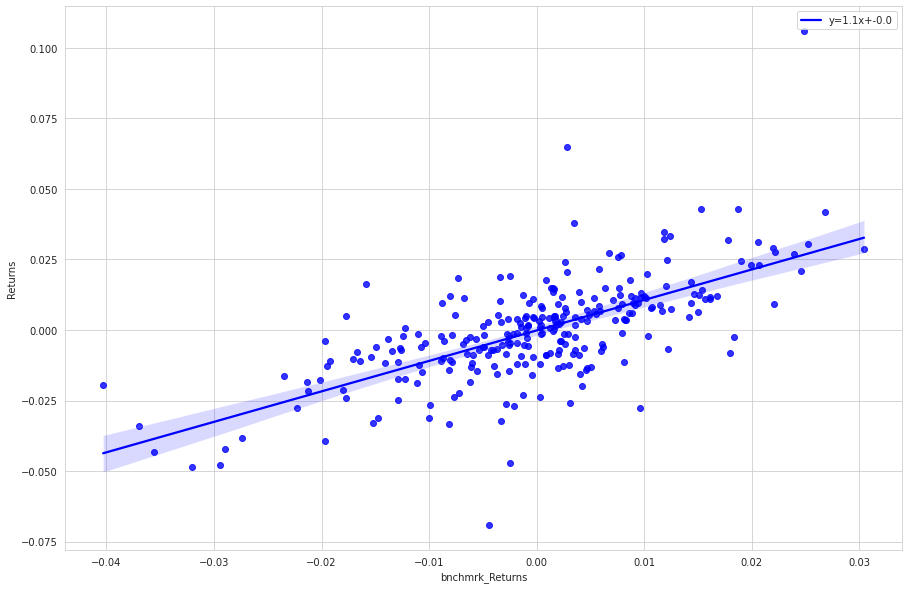

In [ ]:
market_ref = 'SPY'
capm_evaluation(stock, market_ref)

In [ ]:
hist = rsi_calculation(stock, years = 1)
hist.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,gain,loss,avg_gain,avg_loss,rs,rsi_manual
Date,,,,,,,,,,,,,,
2021-06-04,228.263919,229.607517,227.646844,229.050171,5085700,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-07,231.747332,233.568653,228.990445,230.224579,5421300,0.0,0,1.174408,1.17,0.0,NaN,NaN,NaN,NaN
2021-06-08,231.050643,231.747341,229.070077,230.951126,4170600,0.0,0,0.726547,0.73,0.0,NaN,NaN,NaN,NaN
2021-06-09,231.398987,233.737865,231.020782,231.209885,4659000,0.0,0,0.258759,0.26,0.0,NaN,NaN,NaN,NaN
2021-06-10,231.996152,233.150647,231.030744,232.842117,4452500,0.0,0,1.632233,1.63,0.0,NaN,NaN,NaN,NaN


In [ ]:
rsi_viz(hist)

unwanted_words = ['visa', 'v']
stock_news_headers_word_cloud(stock, unwanted_words)

Endpoint Response Code: 200
# of Tweets added from this response:  100
[('passport', 36), ('stamps', 36), ('eu', 22), ('community', 19), ('amp', 19), ('entry', 19), ('event', 18), ('buy', 18), ('important', 18), ('holiday', 18), ('brexit', 18), ('relevant', 18), ('exit', 18), ('alumni', 17), ('chapter', 17)]


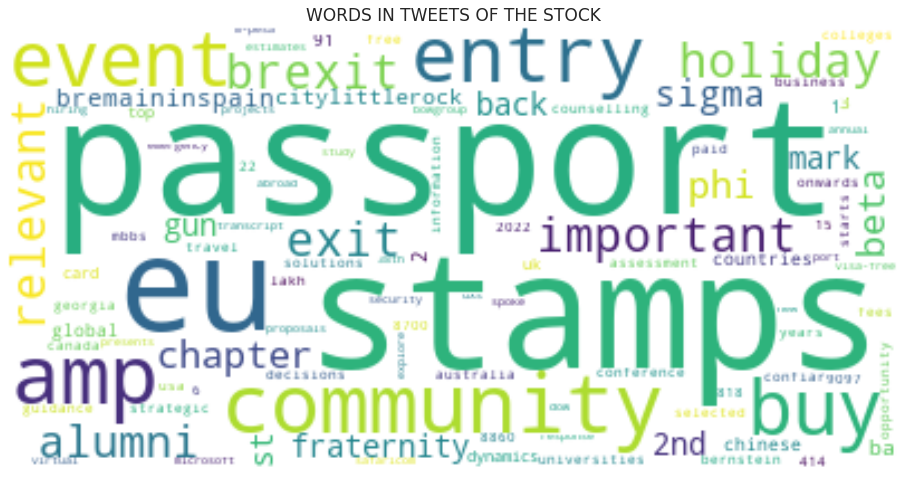

In [ ]:
tweets_df = tweeter_request(stock)
unwanted_words = ['inc', 'v', 'visa']
tweets_word_cloud(tweets_df, unwanted_words)

#Guidelines

1. Getting the data from the Bloomberg terminal – with long history
2. Calculating additional features: many technical indicators such as RSI, MACD, moving average etc.
3. Calculating the signals based on each of the indicators
Example: RSI between 30 – 70 nothing; below 30 buy, above 70 sell
https://www.investopedia.com/terms/r/rsi.asp
https://cointelegraph.com/news/here-s-3-ways-the-relative-strength-index-rsi-can-be-used-as-a-sell-signal
4. Later probably applying some feature selection methods here – Boruta, …
5. Calculate the BINARY target variable sell or buy e.g. based on the 1st differences day by day
6. Based on all of these signals train a classifier
7. Improve classification by parameter adjustments e.g. the boundaries 30 and 70

8. convert data to data series
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
10. Calculate technical indicators such as RSI
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
11. Stick with one asset

-----------------
-	Stick to a concrete example
-	Look up published results for RSI and other technical indicators with precise results
-	Compare number by number
-	Add more technical indicators
-	Following the rules of the indicators calculate ordinal variables with trading signals
-	Calculate a target variable on a daily basis such as sell / buy in case change above X%
-	Cut of 20% of the end(!) of the time series
-	Scenario 1
o	Based on the original technical indicators train a classifier on the 80% left
o	Evaluate model based on 20% new data
-	Scenario 2
o	Based on the trading signals generated apply the same procedure
-	Later we could improve the prediction based on NLP results and merge the predictions to get a final result

--------------

-	You started the feature engineering by calculating RSI
-	In the graph you defined the usual boundaries for RSI with 30 and 70?
-	This lead to a signal -> generate a new variable RSI_signal which is a factor: buy, hold, sell
-	Then we also need a target variable. I would suggest to create one as follows
o	daily difference equals e.g. 1 percent -> target_signal as factor sell, hold, buy
-	then we train a model  target_signal ~ RSI signal
o	random forrest
o	SVM
o	Cohonen network
-	Extend model target_signal ~ RSI signal + MACD signal + …
-	Having mor indicators at hand we could also try later to identify the most important ones


## Data Validation

In [ ]:
#needed columns "open", "high", "low", "close", "volume".
stock = "V"
years = 1
symbol = yf.Ticker(stock)
# get historical market data
start_time = datetime.now() - timedelta(days=years*365)
start_time = start_time.strftime("%Y-%m-%d")
end_time = datetime.now()
end_time = end_time.strftime("%Y-%m-%d")
hist = symbol.history(start=start_time, end=end_time)
hist.drop(columns = ['Dividends', "Stock Splits"], inplace = True)
hist.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-04,227.828787,229.169824,227.212889,228.613541,5085700
2021-06-07,231.305556,233.123405,228.553925,229.785706,5421300
2021-06-08,230.610207,231.305576,228.633416,230.510880,4170600
2021-06-09,230.957892,233.292311,230.580408,230.769150,4659000
2021-06-10,231.553917,232.706211,230.590349,232.398270,4452500


### Tentative Technical indicators

* RSI - Relative Strength Index oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30.

* MACD - Moving Average Convergence/Divergence indicator is a momentum oscillator.
MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish.

* ATR - Average True Range measures volatility, taking into account any gaps in the price movement.High ATR values usually result from a sharp advance or decline. Low ATR value indicates a series of periods with small ranges (quiet days).

* ADX - Average directional index is a short-term technical indicator that can help you evaluate the market or an investment’s strength.

* CCI - Commodity Channel Index measures the current price level relative to an average price level over a given period of time. CCI is relatively high when prices are far above their average. CCI is relatively low when prices are far below their average. Using this method, CCI can be used to identify overbought and oversold levels.

* OBV - On Balance Volume measures buying and selling pressure as a cumulative indicator that adds volume on up days and subtracts volume on down days. When the security closes higher than the previous close, all of the day’s volume is considered up-volume. When the security closes lower than the previous close, all of the day’s volume is considered down-volume.

* AD - accumulation/distribution indicator is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The A/D measure seeks to identify divergences between the stock price and the volume flow. This provides insight into how strong a trend is. If the price is rising but the indicator is falling, then it suggests that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming.


In [ ]:
hist = rsi_calculation(stock, years = 1)
hist.ta.rsi(close='Close', append=True)
hist.ta.macd(close='Close', append=True)
hist.ta.atr(close='Close', append=True)
hist.ta.adx(close='Close', append=True)

hist.ta.cci(close='Close', append=True)
hist.ta.obv(close='Close', append=True)
hist.ta.ad(close='Close', append=True)
hist.ta.adx(close='Close', append=True)

hist.drop(columns = ['Dividends', "Stock Splits", "diff", "gain", "loss", "avg_gain", "avg_loss", "rs", "MACD_12_26_9", "MACDs_12_26_9", "DMP_14", "DMN_14"], inplace = True)
hist = hist.sort_values(by = "Date", ascending = False)
hist.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,rsi_manual,RSI_14,MACDh_12_26_9,ATRr_14,ADX_14,CCI_14_0.015,OBV,AD
Date,,,,,,,,,,,,,
2022-06-03,212.949997,214.210007,211.270004,212.649994,4351600,55.409088,55.409164,1.877855,6.40483,14.350240,93.750199,-97177300.0,-3.695334e+07
2022-06-02,211.889999,215.250000,211.080002,215.050003,5337200,58.028081,58.028416,2.018258,6.60674,14.052472,125.396669,-92825700.0,-3.668688e+07


https://aiolux.com/reports/analytics-technical-indicators?symbol=V&tab_name=rsi

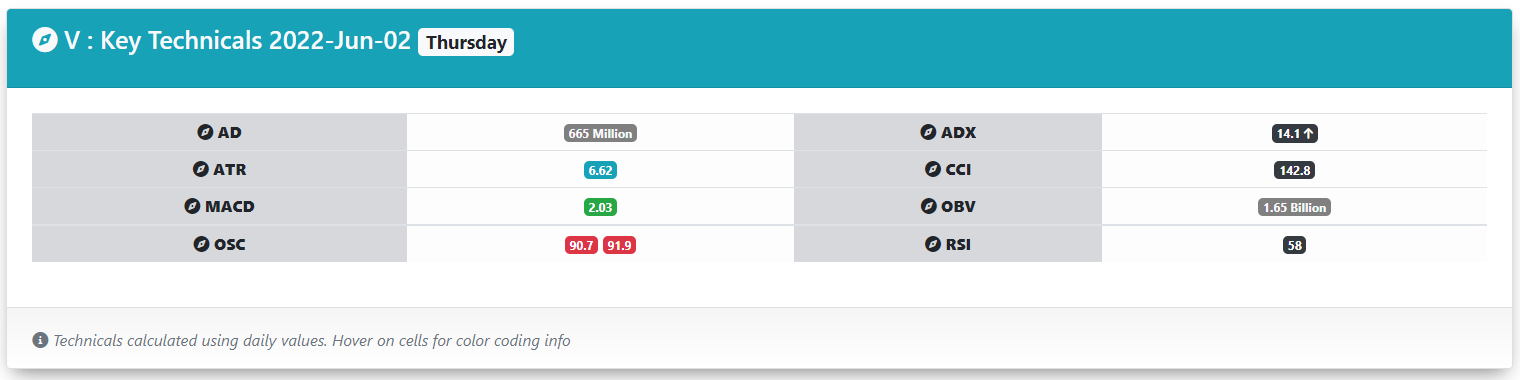

## Create target variable

In [ ]:
#needed columns "open", "high", "low", "close", "volume".
stock = "V"
years = 8
symbol = yf.Ticker(stock)
# get historical market data
start_time = datetime.now() - timedelta(days=years*365)
start_time = start_time.strftime("%Y-%m-%d")
end_time = datetime.now()
end_time = end_time.strftime("%Y-%m-%d")
hist = symbol.history(start=start_time, end=end_time)
hist.drop(columns = ['Dividends', "Stock Splits"], inplace = True)
hist['Daily_pct_change'] = hist['Close'].pct_change()
hist = hist.iloc[1: , :]
hist.head()

,Open,High,Low,Close,Volume,Daily_pct_change
Date,,,,,,
2014-06-13,50.168722,50.216083,49.927199,50.031384,7085200,-0.002267
2014-06-16,49.934306,49.960353,49.718826,49.782761,7899200,-0.004969
2014-06-17,49.759087,50.180573,49.702256,49.917736,5722400,0.002711
2014-06-18,49.832490,50.021923,49.496249,50.021923,10326000,0.002087
2014-06-19,50.074023,50.237409,49.257098,49.801716,15331200,-0.004402


RSI - sell when the price is above the overbought threshold and buy when it’s below the oversold threshold. By adding the signal_indicators=True argument to our RSI method we get a True/False (0/1) if the price moves outside either of these thresholds. 

RSI_14_A_70	RSI_14_B_30	
These columns have 0 (False) values when the RSI is outside of these boundaries (above the RSI_14_A_70 and below the RSI_14_B_30) 

In [ ]:
hist.ta.rsi(close='Close', append=True, signal_indicators=True, xa=70, xb=30)
#hist.ta.macd(close='Close', append=True, signal_indicators=True, xa=70, xb=30)
hist = hist.sort_values(by = "Date", ascending = False)
hist.head(2)

,Open,High,Low,Close,Volume,Daily_pct_change,RSI_14,RSI_14_A_70,RSI_14_B_30
Date,,,,,,,,,
2022-06-09,212.589996,213.710007,206.020004,206.110001,5138600,-0.034614,47.506738,0,0
2022-06-08,213.759995,215.570007,212.830002,213.500000,3646300,-0.004662,55.858333,0,0


In [ ]:
hist = hist.dropna(how='all') #drop rows with al NaNs
hist = hist.dropna(subset=['RSI_14']) #drop ros with RSI = NaN
hist.RSI_14_A_70 = hist.RSI_14_A_70.apply(lambda x: "SELL" if x == 1 else "HOLD")
hist.RSI_14_B_30 = hist.RSI_14_B_30.apply(lambda x: "BUY" if x == 1 else "HOLD")
hist.head(2)

,Open,High,Low,Close,Volume,Daily_pct_change,RSI_14,RSI_14_A_70,RSI_14_B_30
Date,,,,,,,,,
2022-06-09,212.589996,213.710007,206.020004,206.110001,5138600,-0.034614,47.506738,HOLD,HOLD
2022-06-08,213.759995,215.570007,212.830002,213.500000,3646300,-0.004662,55.858333,HOLD,HOLD


In [ ]:
hist['RSI_signal'] = np.where(hist.RSI_14_A_70 == "SELL", 'SELL', np.where(hist.RSI_14_B_30 == "BUY", 'BUY','HOLD'))
hist.groupby(['RSI_14_A_70','RSI_14_B_30','RSI_signal']).size().reset_index().rename(columns={0:'count'})

,RSI_14_A_70,RSI_14_B_30,RSI_signal,count
0,HOLD,BUY,BUY,11
1,HOLD,HOLD,HOLD,1811
2,SELL,HOLD,SELL,177


In [ ]:
hist["RSI_signal"] = hist["RSI_signal"].astype('category')
hist['RSI_signal_factor'], _ = pd.factorize(hist['RSI_signal'], sort=True)
hist.groupby(['RSI_14_A_70','RSI_14_B_30','RSI_signal_factor']).size().reset_index().rename(columns={0:'count'})

,RSI_14_A_70,RSI_14_B_30,RSI_signal_factor,count
0,HOLD,BUY,0,11
1,HOLD,HOLD,1,1811
2,SELL,HOLD,2,177


In [ ]:
hist.drop(columns=["RSI_14_A_70", "RSI_14_B_30",'RSI_signal'], inplace = True)
hist.head(2)

,Open,High,Low,Close,Volume,Daily_pct_change,RSI_14,RSI_signal_factor
Date,,,,,,,,
2022-06-09,212.589996,213.710007,206.020004,206.110001,5138600,-0.034614,47.506738,1
2022-06-08,213.759995,215.570007,212.830002,213.500000,3646300,-0.004662,55.858333,1


In [ ]:
hist['Daily_pct_change'].describe()
#hist[hist['Daily_pct_change'] > 0.1]
#start_date = '2022-01-25'
#end_date = '2022-02-02'
#hist.query('Date > @start_date and Date < @end_date')

count    1999.000000
mean        0.000832
std         0.016248
min        -0.135472
25%        -0.006484
50%         0.001346
75%         0.008529
max         0.138426
Name: Daily_pct_change, dtype: float64

In [ ]:
percentage_threshold = 0.03
print("TARGET VARIABLE WITH A THRESHOLD OF +-", percentage_threshold*100, "%\n")
hist['pct_chnge_sgnal'] = np.where(hist.Daily_pct_change > percentage_threshold, 'SELL', np.where(hist.Daily_pct_change < -percentage_threshold, 'BUY','HOLD'))
hist.groupby(['pct_chnge_sgnal']).size().reset_index().rename(columns={0:'count'})

TARGET VARIABLE WITH A THRESHOLD OF +- 3.0 %



,pct_chnge_sgnal,count
0,BUY,66
1,HOLD,1882
2,SELL,51


In [ ]:
hist['target_variable'], _ = pd.factorize(hist['pct_chnge_sgnal'], sort=True)
hist.drop(columns=['pct_chnge_sgnal'], inplace = True)
hist.groupby(['target_variable']).size().reset_index().rename(columns={0:'count'})

,target_variable,count
0,0,66
1,1,1882
2,2,51


In [ ]:
hist.head(2)

,Open,High,Low,Close,Volume,Daily_pct_change,RSI_14,RSI_signal_factor,target_variable
Date,,,,,,,,,
2022-06-09,212.589996,213.710007,206.020004,206.110001,5138600,-0.034614,47.506738,1,0
2022-06-08,213.759995,215.570007,212.830002,213.500000,3646300,-0.004662,55.858333,1,1


####Split data

In [ ]:
hist2 = hist.sort_values(by = "Date", ascending = True)
X, Y = hist2.iloc[: , :-1], hist.target_variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [ ]:
print("TRAIN: ", len(X_train), " FROM ", X_train.index[[0]][0], " TO ",X_train.index[[-1]][0],
      "\nTEST: ", len(X_test), " FROM ", X_test.index[[0]][0], " TO ",X_test.index[[-1]][0])
hist3 = hist.reset_index()
hist3 = hist3.drop(columns=["Date", "Open",	"High",	"Low", "Volume", "Daily_pct_change", "RSI_14"])
X, Y = hist3.iloc[: , :-1], hist.target_variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

TRAIN:  1599  FROM  2014-07-03 00:00:00  TO  2020-11-05 00:00:00 
TEST:  400  FROM  2020-11-06 00:00:00  TO  2022-06-09 00:00:00


####Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
X_train.iloc[[0]]

,Close,RSI_signal_factor
0,206.110001,1


In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
accuracy_score(y_true= y_train, y_pred=decision_tree.predict(X_train))

0.9993746091307066

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.42

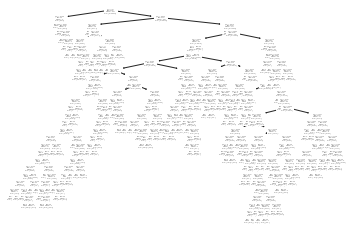

In [ ]:
plot_tree(decision_tree);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 51 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


SCORE MEAN:  0.8618684210526318 
STDEV:  0.10764379997533621 



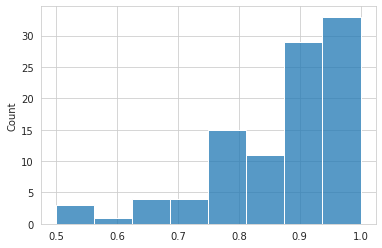

In [ ]:
scores = cross_val_score(decision_tree, X, Y, cv = 100)
print("SCORE MEAN: ", scores.mean(), "\nSTDEV: ", scores.std(), "\n")
sns.histplot(scores)

###AUTOML

In [ ]:
from autosklearn.classification import AutoSklearnClassifier
# define search
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: 2e6aead0-e90f-11ec-8cd5-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.935606
  Number of target algorithm runs: 34
  Number of successful target algorithm runs: 32
  Number of crashed target algorithm runs: 2
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 0.965
